In [2]:
%pylab inline
import numpy as np
from numpy import array
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Introduction 

feature들을 설명합니다.

https://docs.aws.amazon.com/deepracer/latest/developerguide/deepracer-train-models-define-reward-function.html

# closest_waypoint

The zero-based index of the closest waypoint relative to the vehicle's x and y positions as measured by the Euclidean distance:

```
argmini(..., (xw,i-x)2+(y-yw,i-y)2,...)
```
The closest waypoint can be in front of the vehicle or behind it.

Range...

```
[0, number of waypoints -1]
```

그냥 정수값이다. 
현재 자동차의 위치에서 가장 가까운 waypoints의 index번호라고 생각하면 쉽다


In [5]:
# 현재 자동차의 waypoints상에서의 인덱스 위치
closest_waypoint = 18

print('closest_waypoints:', closest_waypoint)
print('waypoint:', waypoints[closest_waypoint])

closest_waypoints: 18
waypoint: [4.  2.1]


# waypoints

An ordered list of waypoints following the vehicle's progress along the track.

```
[(xw,1,yw,1), (xw,2, yw,2), …]
```

waypoints: (30, 2)


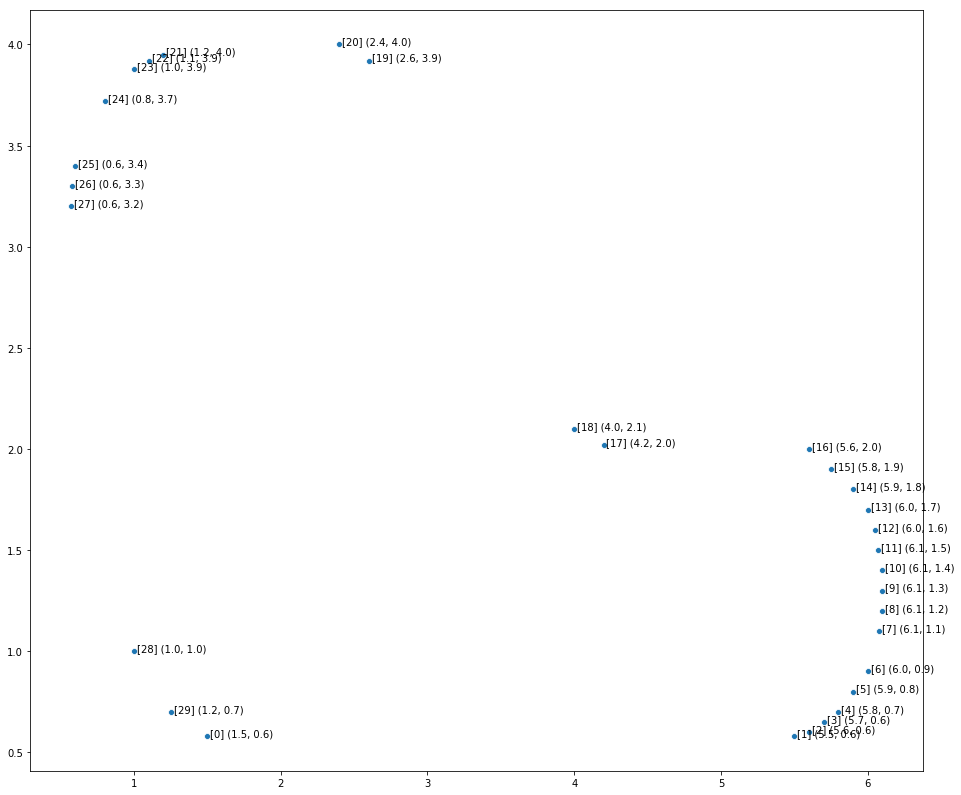

In [9]:
# waypoints는 아래의 값을 고정적으로 계속 갖고 있는다. 
waypoints = np.array([array([ 1.5 , 0.58]), array([ 5.5 , 0.58]), array([ 5.6, 0.6]), array([ 5.7 , 0.65]), 
               array([ 5.8, 0.7]), array([ 5.9, 0.8]), array([ 6. , 0.9]), array([ 6.08, 1.1 ]), 
               array([ 6.1, 1.2]), array([ 6.1, 1.3]), array([ 6.1, 1.4]), array([ 6.07, 1.5 ]), 
               array([ 6.05, 1.6 ]), array([ 6. , 1.7]), array([ 5.9, 1.8]), array([ 5.75, 1.9 ]), 
               array([ 5.6, 2. ]), array([ 4.2 , 2.02]), array([ 4. , 2.1]), array([ 2.6 , 3.92]), 
               array([ 2.4, 4. ]), array([ 1.2 , 3.95]), array([ 1.1 , 3.92]), array([ 1. , 3.88]), 
               array([ 0.8 , 3.72]), array([ 0.6, 3.4]), array([ 0.58, 3.3 ]), array([ 0.57, 3.2 ]), 
               array([ 1., 1.]), array([ 1.25, 0.7 ])])


fig, plots = subplots(1, figsize=(16, 14))
ax = sns.scatterplot(waypoints[:,0], waypoints[:, 1], ax=plots)
for i, (x, y) in enumerate(waypoints):
    ax.text(x+.02, y, str(f'[{i}] ({round(x, 1)}, {round(y, 1)})'))
    
print('waypoints:', waypoints.shape)

### 다음 waypoint 가져오기

아래 코드를 그대로 가져다가 사용하면 됩니다.

In [82]:
closest_waypoint = 15


next_index = closest_waypoint + 1
if next_index >= len(waypoints) -1:
    next_index = 0 

current_waypoint = waypoints[closest_waypoint]
next_waypoint = waypoints[next_index]

print('current waypoint index:', closest_waypoint)
print('next waypoint index   :', next_index)
print('current waypoint      :', current_waypoint)
print('next waypoint         :', next_waypoint)
print( (next_waypoint - current_waypoint) )

current waypoint index: 15
next waypoint index   : 16
current waypoint      : [5.75 1.9 ]
next waypoint         : [5.6 2. ]
[-0.15  0.1 ]


# ETC

## 초기 시작시 distance from center가 0이 되는 y축 좌표

y = 0.58 일때 distance_from_center는 0값이 된다<br>

```
[Anderson][04] on_track:True | xy:2.63,0.58 | dist:0.0 | progress:0.0 | steps:26 | throttle:0.8 | st:-0.8 | width:0.44 | cur_wp:0 0 -> 1 [ 5.5 0.58] | car_orientation:0 | Reward: 0.11
```